# Regressão - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.formula.api as smf

%matplotlib inline

plt.rc('figure', figsize=(6, 4))

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
df = pd.DataFrame()
df['x'] = tips['net_bill']
df['y'] = tips['tip_pct']

In [4]:
df.describe()

,x,y
count,244.000000,244.000000
mean,16.787664,0.202123
std,8.032459,0.163385
min,2.070000,0.036955
25%,11.000000,0.148274
50%,14.555000,0.183110
75%,20.685000,0.236821
max,43.170000,2.452381


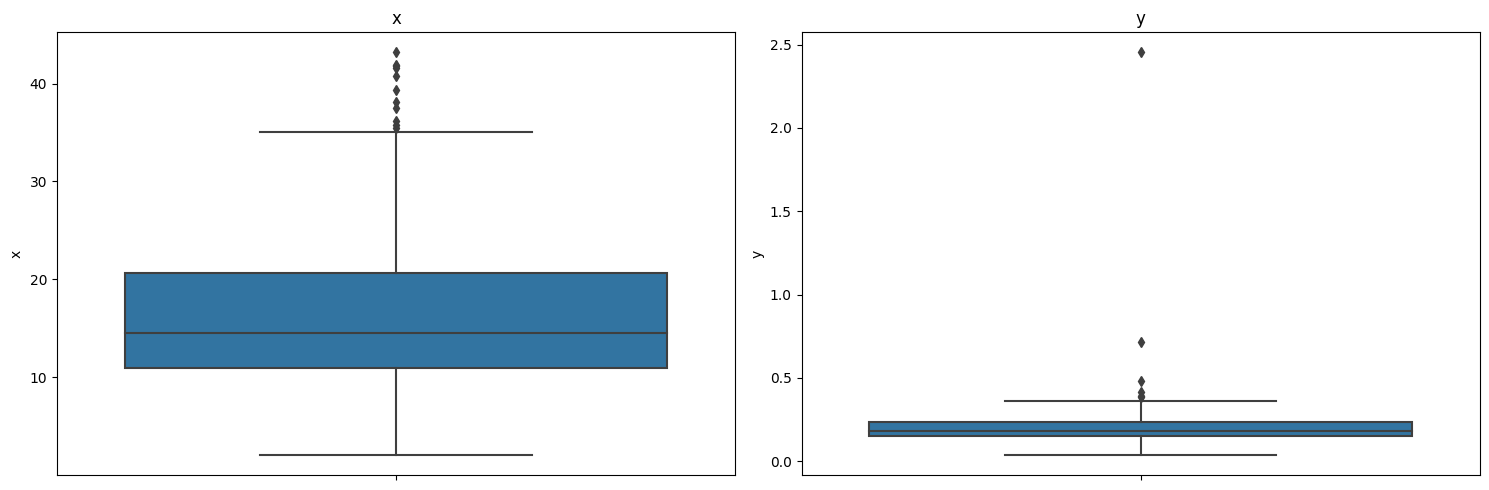

In [5]:
# Definindo o número de subplots e a disposição (1 linha e o número de colunas igual ao número de variáveis)
num_variaveis = df.shape[1]  # Número de variáveis
fig, axs = plt.subplots(1, num_variaveis, figsize=(15, 5))

# Plotando cada boxplot em seu próprio gráfico
for i, coluna in enumerate(df.columns):
    sns.boxplot(y=df[coluna], ax=axs[i])
    axs[i].set_title(coluna)

plt.tight_layout()
plt.show()

In [6]:
# eliminando alguns outliers
df = df[df['y']<=0.7]

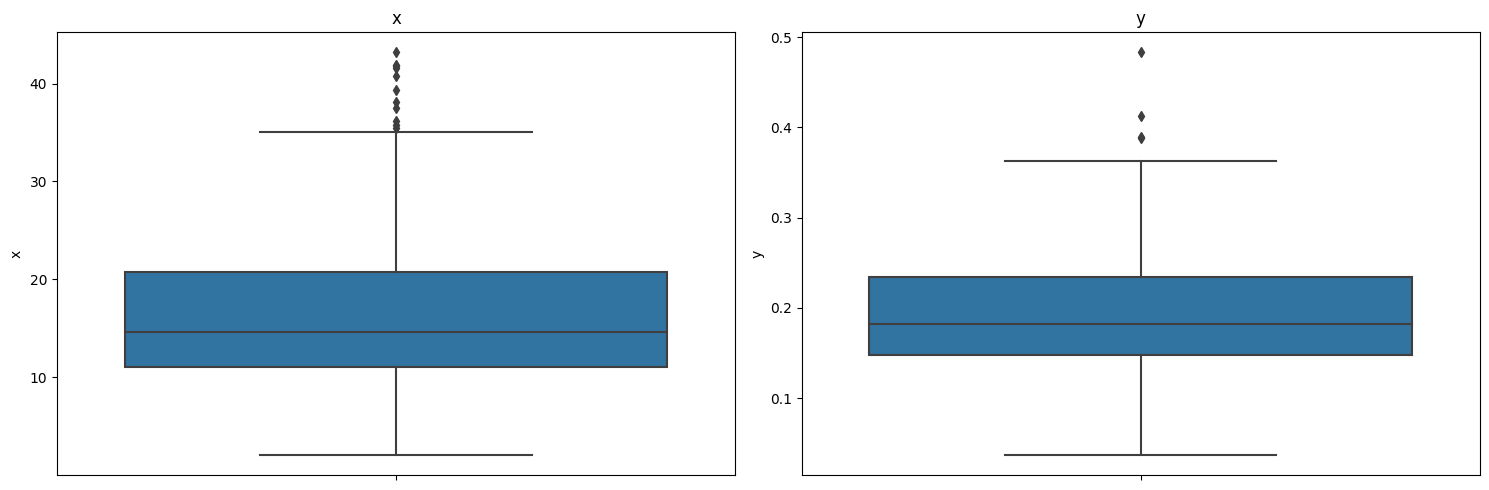

In [7]:
# Definindo o número de subplots e a disposição (1 linha e o número de colunas igual ao número de variáveis)
num_variaveis = df.shape[1]  # Número de variáveis
fig, axs = plt.subplots(1, num_variaveis, figsize=(15, 5))

# Plotando cada boxplot em seu próprio gráfico
for i, coluna in enumerate(df.columns):
    sns.boxplot(y=df[coluna], ax=axs[i])
    axs[i].set_title(coluna)

plt.tight_layout()
plt.show()

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     68.11
Date:                Fri, 22 Sep 2023   Prob (F-statistic):           1.03e-14
Time:                        18:44:26   Log-Likelihood:                 336.29
No. Observations:                 242   AIC:                            -668.6
Df Residuals:                     240   BIC:                            -661.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3818      0.023     16.261      0.0

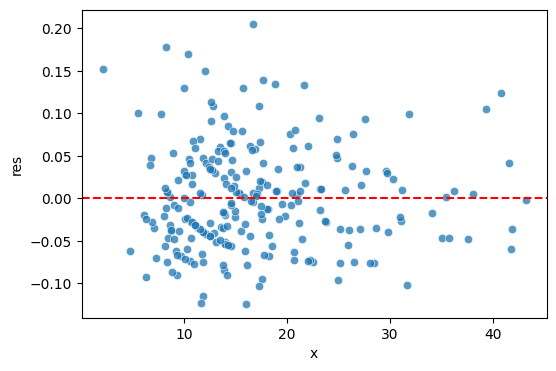

In [8]:
reg = smf.ols('y ~ np.log(x)', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

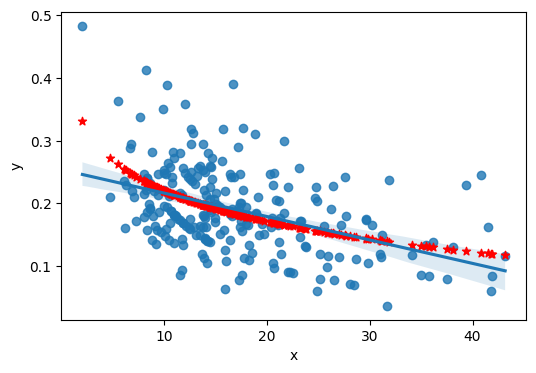

In [9]:
#pred_y = pd.Series(reg.fittedvalues)
#pred_y = pred_y.sort_values(ascending=True)
sns.regplot(x = 'x', y = 'y', data = df)
#plt.plot(df['x'], reg.fittedvalues, 'r,--')
plt.scatter(df['x'], reg.fittedvalues, marker='*', c='red')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     30.98
Date:                Fri, 22 Sep 2023   Prob (F-statistic):           1.09e-12
Time:                        18:44:27   Log-Likelihood:                 333.96
No. Observations:                 242   AIC:                            -661.9
Df Residuals:                     239   BIC:                            -651.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2932      0.020     14.

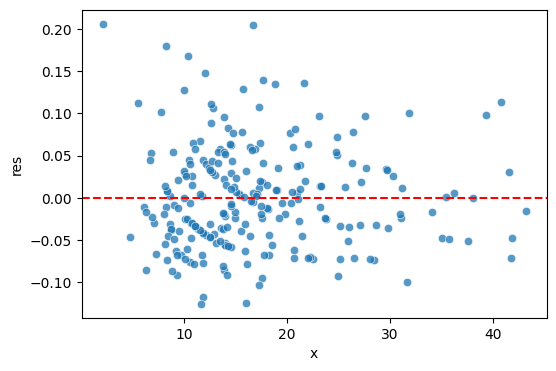

In [10]:
reg = smf.ols('y ~ np.power(x,2) + x', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

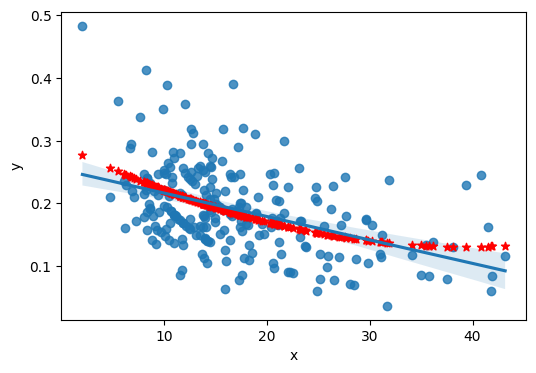

In [11]:
sns.regplot(x = 'x', y = 'y', data = df)
#plt.plot(df['x'], reg.fittedvalues, 'r,--')
plt.scatter(df['x'], reg.fittedvalues, marker='*', c='red')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:              np.log(y)   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     69.62
Date:                Fri, 22 Sep 2023   Prob (F-statistic):           5.70e-15
Time:                        18:44:27   Log-Likelihood:                -81.349
No. Observations:                 242   AIC:                             166.7
Df Residuals:                     240   BIC:                             173.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3383      0.051    -26.095      0.0

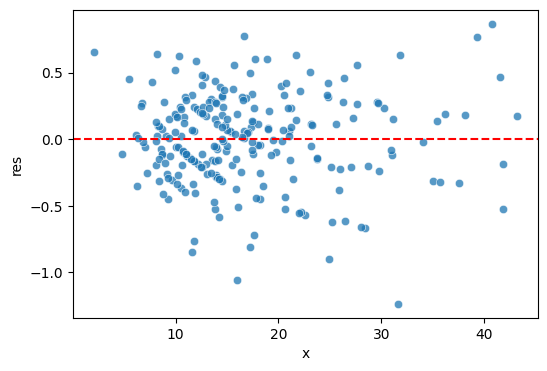

In [12]:
reg = smf.ols('np.log(y) ~ x', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [13]:
df['pred_y'] = np.exp(reg.fittedvalues)

df[['pred_y', 'y']].corr().iloc[0,1]**2

0.20051484016183763

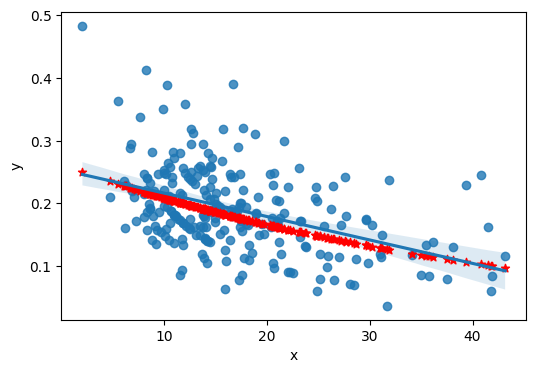

In [14]:
sns.regplot(x = 'x', y = 'y', data = df)
#plt.plot(df['x'], df['pred_y'], 'r,--')
plt.scatter(df['x'], df['pred_y'], marker='*', c='red')

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     68.11
Date:                Fri, 22 Sep 2023   Prob (F-statistic):           1.03e-14
Time:                        18:44:28   Log-Likelihood:                 336.29
No. Observations:                 242   AIC:                            -668.6
Df Residuals:                     240   BIC:                            -661.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3818      0.023     16.261      0.0

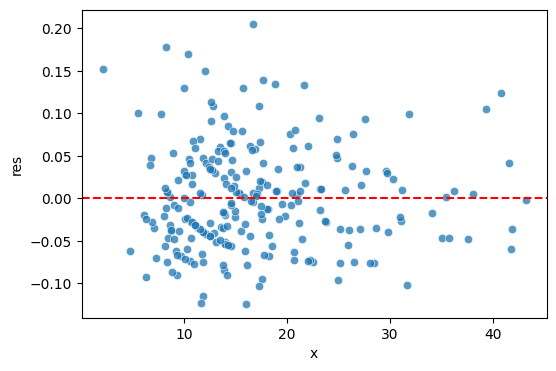

In [15]:
reg = smf.ols('y ~ np.log(x)', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

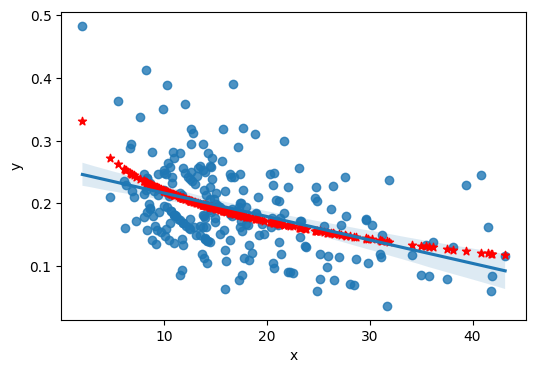

In [16]:
sns.regplot(x = 'x', y = 'y', data = df)
plt.scatter(df['x'], reg.fittedvalues, marker='*', c='red')

In [17]:
df['pred_y'] = np.exp(reg.fittedvalues)

df[['pred_y', 'y']].corr().iloc[0,1]**2

0.22284954757453054

###  6. qual modelo resultou no melhor ajuste?

- Não houve uma diferença significatica entre os modelos, com todos ficando com o R² de aproximadamente de 0.22
- Ajustes em X e y, não resultaram em melhora do modelo